In [12]:
pip install pandas numpy matplotlib seaborn faiss-cpu sentence-transformers fastapi uvicorn requests


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert date columns to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Create an arrival_date column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

# Save cleaned dataset
df.to_csv("cleaned_bookings.csv", index=False)
print("Data preprocessing completed and saved!")
df.head()

<ipython-input-13-4768e6b7fc00>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Data preprocessing completed and saved!


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [14]:
import os
print(os.listdir())  # Lists all files in the current directory


['.config', 'drive', 'chroma_db', 'cleaned_bookings.csv', 'sample_data']


In [15]:
import os
import pandas as pd

# Load the DataFrame
df = pd.read_csv("cleaned_bookings.csv")

df.to_csv("cleaned_bookings.csv", index=False)
print(f"Cleaned file saved at: {os.path.abspath('cleaned_bookings.csv')}")

Cleaned file saved at: /content/cleaned_bookings.csv


In [16]:
df.to_csv("/content/drive/MyDrive/cleaned_bookings.csv", index=False)
os.makedirs("/content/drive/MyDrive", exist_ok=True)



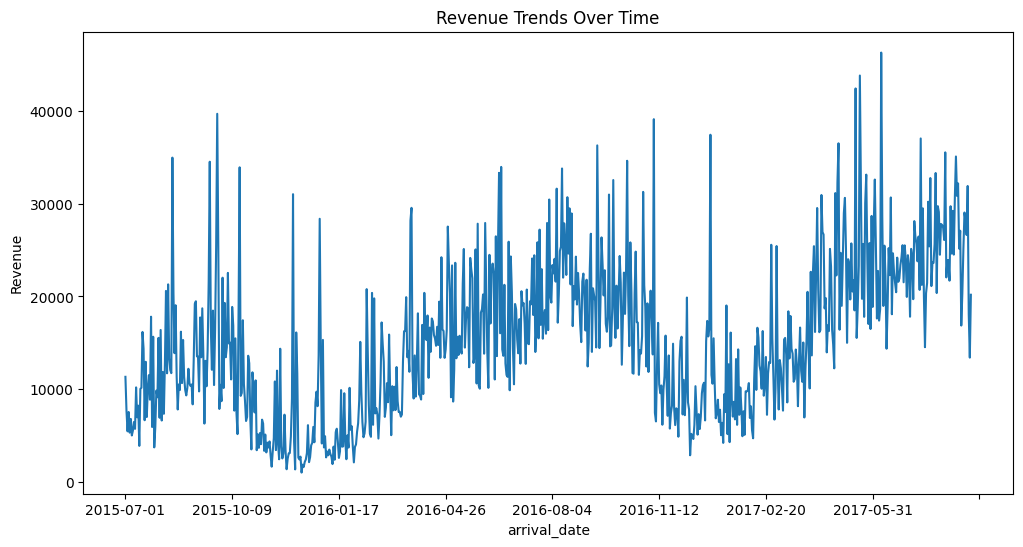

Cancellation Rate: 37.04%


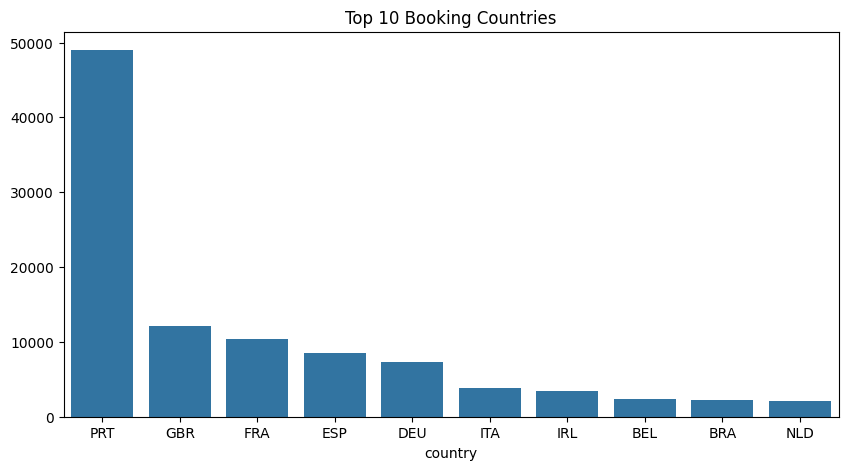

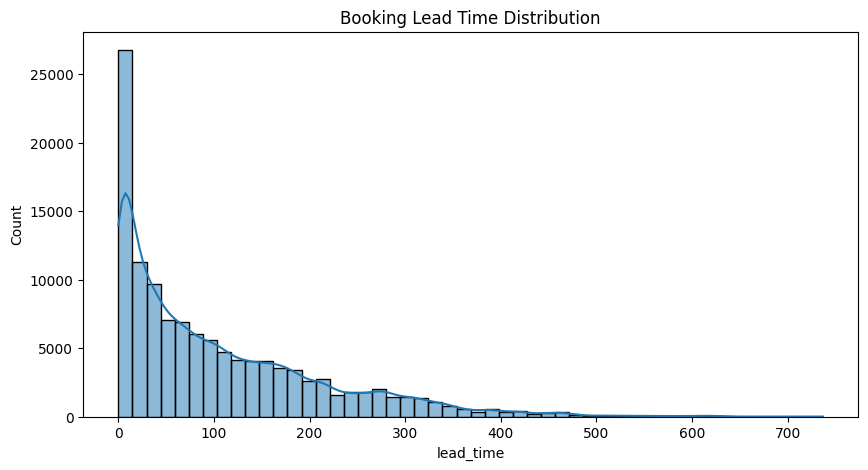

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_bookings.csv")
df.head()

# Revenue Trends
monthly_revenue = df.groupby(df['arrival_date'].astype(str))['adr'].sum()
plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', title="Revenue Trends Over Time")
plt.ylabel("Revenue")
plt.show()

# Cancellation Rate
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

# Geographical Distribution
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Booking Countries")
plt.show()

# Booking Lead Time Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title("Booking Lead Time Distribution")
plt.show()


In [5]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.6
    Uninstalling langchain-text-splitters-0.3.6:
      Successfully uninstalled langchain-text-splitters-0.3.6
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.20
    Uninstalling langchain-0.3.20:
      Successfully uninstalled langchain-0.3.20


In [6]:
#RAG
!pip install chromadb langchain sentence-transformers transformers torch faiss-cpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 9.0 MB/s eta 0:

In [7]:
import chromadb
from sentence_transformers import SentenceTransformer
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
# Load ChromaDB (or FAISS) for storing embeddings
client = chromadb.PersistentClient(path="./chroma_db")
collection = client.get_or_create_collection(name="hotel_bookings")

# Load Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example booking data
queries = [
    "Total revenue in July 2017",
    "Highest booking cancellations by location",
    "Average hotel booking price"
]

embeddings = model.encode(queries)

# Store in ChromaDB
collection.add(
    ids=["q1", "q2", "q3"],
    embeddings=embeddings.tolist(),
    metadatas=[{"question": q} for q in queries]
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
!pip uninstall -y fsspec gcsfs datasets



Found existing installation: fsspec 2024.12.0
Uninstalling fsspec-2024.12.0:
  Successfully uninstalled fsspec-2024.12.0
Found existing installation: gcsfs 2025.3.0
Uninstalling gcsfs-2025.3.0:
  Successfully uninstalled gcsfs-2025.3.0
Found existing installation: datasets 3.4.1
Uninstalling datasets-3.4.1:
  Successfully uninstalled datasets-3.4.1


In [9]:
!pip install fsspec==2024.12.0 gcsfs datasets --quiet

In [10]:
!pip install faiss-cpu transformers sentence-transformers datasets fastapi uvicorn pyngrok nest_asyncio


In [18]:
import pandas as pd

# Load hotel booking dataset
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

# Select relevant columns for Q&A system
df = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'adr']]
df.fillna("", inplace=True)  # Fill NaN values with empty strings

# Convert data to a text format for retrieval
df['text'] = df.apply(lambda row: f"Hotel: {row['hotel']}, Year: {row['arrival_date_year']}, Month: {row['arrival_date_month']}, Price: {row['adr']}", axis=1)

# Save text data
documents = df['text'].tolist()

print("✅ Data loaded and preprocessed!")


✅ Data loaded and preprocessed!


In [19]:
!pip install faiss-cpu sentence-transformers langchain transformers torch


In [20]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

# Load embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text data into embeddings
document_embeddings = embedding_model.encode(documents)  # 'documents' comes from your preprocessed data

# Initialize FAISS index
dimension = document_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 distance-based similarity search
index.add(np.array(document_embeddings))

print("✅ Embeddings stored in FAISS!")



✅ Embeddings stored in FAISS!


In [21]:
import os

# Check if the FAISS directory exists
if os.path.exists("faiss_index/index.faiss"):
    print("✅ FAISS index found. Proceeding to load...")
else:
    print("⚠️ FAISS index not found. You may need to recreate it.")


⚠️ FAISS index not found. You may need to recreate it.


In [22]:
import shutil
import os
import time

# ✅ Step 1: Ensure 'faiss_index' is fully removed before recreating
faiss_path = "faiss_index"

if os.path.exists(faiss_path):
    print("⚠️ Deleting old FAISS index...")
    shutil.rmtree(faiss_path, ignore_errors=True)  # Try normal delete
    time.sleep(2)  # Wait for OS to process deletion

    # Double-check if deletion was successful
    if os.path.exists(faiss_path):
        print("⚠️ Normal delete failed. Forcing removal...")
        os.system(f"rm -rf {faiss_path}")  # Force delete (Linux/macOS)
        time.sleep(2)

# Ensure it's gone before proceeding
if not os.path.exists(faiss_path):
    print("✅ FAISS index fully deleted.")
else:
    raise Exception("❌ Failed to delete FAISS index! Please check file permissions.")


✅ FAISS index fully deleted.


In [23]:
import pandas as pd
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# ✅ Step 2: Load dataset and process text
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")
df = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'adr']]
df.fillna("", inplace=True)
df['text'] = df.apply(lambda row: f"Hotel: {row['hotel']}, Year: {row['arrival_date_year']}, Month: {row['arrival_date_month']}, Price: {row['adr']}", axis=1)
documents = df['text'].tolist()

# ✅ Step 3: Convert text into LangChain Document objects
doc_objects = [Document(page_content=text) for text in documents]

# ✅ Step 4: Generate embeddings
embedding_func = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

# ✅ Step 5: Create FAISS index
vector_store = FAISS.from_documents(doc_objects, embedding_func)

# ✅ Step 6: Save FAISS index properly
vector_store.save_local("faiss_index")

print("✅ New FAISS index created successfully!")


<ipython-input-23-376aaa8ddec5>:17: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_func = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')


✅ New FAISS index created successfully!


In [24]:
from langchain.llms import HuggingFacePipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

# Set model name (T5)
MODEL_NAME = "t5-base"  # Change to "t5-large" or "t5-small" if needed

# Load tokenizer & model
tokenizer_t5 = AutoTokenizer.from_pretrained(MODEL_NAME)
model_t5 = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME, device_map="auto")

# Create text generation pipeline
t5_pipeline = pipeline("text2text-generation", model=model_t5, tokenizer=tokenizer_t5, max_length=512)

# Convert to LangChain LLM
llm_t5 = HuggingFacePipeline(pipeline=t5_pipeline)

print("✅ T5 model loaded successfully!")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu


✅ T5 model loaded successfully!


<ipython-input-24-3b31ee0b5c6e>:15: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm_t5 = HuggingFacePipeline(pipeline=t5_pipeline)


In [25]:
from langchain.vectorstores import FAISS

# Load FAISS index
vector_store = FAISS.load_local(
    "faiss_index",
    embeddings=embedding_func,
    allow_dangerous_deserialization=True
)

# Convert FAISS into a retriever
retriever = vector_store.as_retriever()
print("✅ FAISS index loaded successfully!")


✅ FAISS index loaded successfully!


In [26]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_name = "t5-small"  # Change to "t5-base" or other variants if needed

# Load model and tokenizer
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

print("✅ Model loaded successfully!")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

✅ Model loaded successfully!


In [27]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "gpt2"  # Or "meta-llama/Llama-2-7b-hf", "mistralai/Mistral-7B-Instruct", etc.

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

print("✅ Causal model loaded successfully!")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

✅ Causal model loaded successfully!


In [28]:
from langchain.chains import RetrievalQA

# 🔄 Choose your model: Uncomment ONE of the below
# llm = llm_pipeline  # Use GPT-2  (llm_pipeline is not defined - commented out)
llm = llm_t5  # Use T5

# Connect the selected model to FAISS retriever
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    return_source_documents=True  # Get retrieved FAISS docs
)

# ✅ Print statement updated to only use llm_t5
print("✅ RAG system is ready for Q&A using T5")

✅ RAG system is ready for Q&A using T5


In [29]:
query = "What was the total revenue for July 2017?"
response = rag_chain({"query": query})

# Extract prices from retrieved documents
prices = []
for doc in response["source_documents"]:
    text = doc.page_content  # Get document text
    try:
        price = float(text.split("Price: ")[1])  # Extract price
        prices.append(price)
    except (IndexError, ValueError):
        continue  # Skip if parsing fails

# Calculate total revenue
total_revenue = sum(prices)

# Display results
print("\n🔹 Answer: Total revenue for July 2017 is:", total_revenue)
print("\n📄 Source Documents:\n")

# ✅ Print each source document on a new line
for i, doc in enumerate(response["source_documents"], 1):
    print(f"{i}. {doc.page_content}\n")


<ipython-input-29-426dba8f5376>:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = rag_chain({"query": query})



🔹 Answer: Total revenue for July 2017 is: 818.2

📄 Source Documents:

1. Hotel: City Hotel, Year: 2017, Month: July, Price: 266.2

2. Hotel: City Hotel, Year: 2017, Month: July, Price: 184.0

3. Hotel: City Hotel, Year: 2017, Month: July, Price: 184.0

4. Hotel: City Hotel, Year: 2017, Month: July, Price: 184.0



In [30]:
import pandas as pd

# Load hotel booking dataset
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

# Compute total revenue per month
revenue_per_month = df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].sum().reset_index()
revenue_per_month['text'] = revenue_per_month.apply(
    lambda row: f"Total revenue for {row['arrival_date_month']} {row['arrival_date_year']}: {row['adr']:.2f}", axis=1
)

# Compute cancellation counts per location
cancellation_counts = df[df['is_canceled'] == 1].groupby('hotel').size().reset_index(name='cancellations')
cancellation_counts['text'] = cancellation_counts.apply(
    lambda row: f"Hotel: {row['hotel']} had {row['cancellations']} cancellations.", axis=1
)

# Compute average booking price
avg_price_per_hotel = df.groupby('hotel')['adr'].mean().reset_index()
avg_price_per_hotel['text'] = avg_price_per_hotel.apply(
    lambda row: f"Hotel: {row['hotel']}, Average booking price: {row['adr']:.2f}", axis=1
)

# Combine insights into a single list
documents = (
    revenue_per_month['text'].tolist() +
    cancellation_counts['text'].tolist() +
    avg_price_per_hotel['text'].tolist()
)

print("✅ Insights precomputed and ready for FAISS storage!")



✅ Insights precomputed and ready for FAISS storage!


In [31]:
pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00


In [32]:
print(f"Total Documents in FAISS Index: {len(vector_store.docstore._dict)}")

Total Documents in FAISS Index: 119390


In [33]:
vector_store = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)

In [34]:
import pandas as pd

# Load hotel booking dataset
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

# Compute total revenue per month
revenue_per_month = df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].sum().reset_index()
revenue_per_month['text'] = revenue_per_month.apply(
    lambda row: f"Total revenue for {row['arrival_date_month']} {row['arrival_date_year']}: {row['adr']:.2f}", axis=1
)

# Compute cancellation counts per location
cancellation_counts = df[df['is_canceled'] == 1].groupby('hotel').size().reset_index(name='cancellations')
cancellation_counts['text'] = cancellation_counts.apply(
    lambda row: f"Hotel: {row['hotel']} had {row['cancellations']} cancellations.", axis=1
)

# Compute average booking price
avg_price_per_hotel = df.groupby('hotel')['adr'].mean().reset_index()
avg_price_per_hotel['text'] = avg_price_per_hotel.apply(
    lambda row: f"Hotel: {row['hotel']}, Average booking price: {row['adr']:.2f}", axis=1
)

# Combine insights into a single list
documents = (
    revenue_per_month['text'].tolist() +
    cancellation_counts['text'].tolist() +
    avg_price_per_hotel['text'].tolist()
)

print("✅ Insights precomputed and ready for FAISS storage!")


✅ Insights precomputed and ready for FAISS storage!


In [35]:
from langchain.embeddings import HuggingFaceEmbeddings

# Initialize HuggingFaceEmbeddings with a SentenceTransformer model
embeddings = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

# Create FAISS index from precomputed insights
vector_store = FAISS.from_texts(documents, embeddings)

# Save FAISS index
vector_store.save_local("faiss_index")

print("✅ FAISS index updated with precomputed insights!")

✅ FAISS index updated with precomputed insights!


In [36]:
vector_store = FAISS.from_texts(documents, embeddings)

In [37]:
vector_store = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)


In [39]:
from langchain.chains import RetrievalQA

# Load FAISS index, setting allow_dangerous_deserialization=True
vector_store = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)

# Create retriever
retriever = vector_store.as_retriever()

# Load LLM (T5 or GPT-2)
llm = llm_t5  # Using T5 model

# Create RAG-based Q&A system
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    return_source_documents=True
)

print("✅ RAG system is ready for Q&A using precomputed insights!")

✅ RAG system is ready for Q&A using precomputed insights!


In [40]:
# Example questions
questions = [
    "Show me total revenue for July 2017.",
    "Which locations had the highest booking cancellations?",
    "What is the average price of a hotel booking?"
]

# Process each query
for query in questions:
    response = rag_chain({"query": query})

    # Print response
    print("\n🔹 Question:", query)
    print("💡 Answer:", response["result"])

    # Print source documents one by one
    print("\n📄 Source Documents:\n")
    for i, doc in enumerate(response["source_documents"], 1):
        print(f"{i}. {doc.page_content}\n")



🔹 Question: Show me total revenue for July 2017.
💡 Answer: True

📄 Source Documents:

1. Total revenue for July 2017: 759959.67

2. Total revenue for July 2016: 573715.30

3. Total revenue for June 2017: 710153.16

4. Total revenue for March 2017: 408746.02


🔹 Question: Which locations had the highest booking cancellations?
💡 Answer: True

📄 Source Documents:

1. Hotel: City Hotel had 33102 cancellations.

2. Hotel: Resort Hotel had 11122 cancellations.

3. Hotel: Resort Hotel, Average booking price: 94.95

4. Hotel: City Hotel, Average booking price: 105.30


🔹 Question: What is the average price of a hotel booking?
💡 Answer: True

📄 Source Documents:

1. Hotel: Resort Hotel, Average booking price: 94.95

2. Hotel: City Hotel, Average booking price: 105.30

3. Hotel: City Hotel had 33102 cancellations.

4. Hotel: Resort Hotel had 11122 cancellations.



In [41]:
!pip install fastapi uvicorn nest-asyncio langchain transformers sentence-transformers faiss-cpu pandas openai pydantic


In [42]:
import pandas as pd
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings # Changed import
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter

# ✅ Load dataset
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

# ✅ Select relevant columns
df = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'adr', 'is_canceled']]
df.fillna("", inplace=True)

# ✅ Convert data to text format
df['text'] = df.apply(lambda row: f"Hotel: {row['hotel']}, Year: {row['arrival_date_year']}, Month: {row['arrival_date_month']}, Price: {row['adr']}, Canceled: {row['is_canceled']}", axis=1)
documents = df['text'].tolist()

# ✅ Split into chunks for FAISS
text_splitter = CharacterTextSplitter(chunk_size=200, chunk_overlap=20)
docs = text_splitter.create_documents(documents)

# ✅ Create FAISS index using HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2') # Changed to HuggingFaceEmbeddings
vector_store = FAISS.from_documents(docs, embeddings)

# ✅ Save FAISS index
vector_store.save_local("faiss_index")

print("✅ FAISS index created & saved!")

✅ FAISS index created & saved!


In [43]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from langchain.chains import RetrievalQA
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

# ✅ Enable FastAPI in Colab
nest_asyncio.apply()

# ✅ Initialize FastAPI
app = FastAPI(title="Hotel Booking Analytics API", version="1.0")

# ✅ Load FAISS index
vector_store = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)
retriever = vector_store.as_retriever()

# ✅ Load T5 Model for Q&A
t5_pipeline = pipeline("text2text-generation", model="t5-small")
llm = HuggingFacePipeline(pipeline=t5_pipeline)

# ✅ Create RAG-based Q&A system
rag_chain = RetrievalQA.from_llm(
    llm=llm,
    retriever=retriever,
    return_source_documents=True
)

# ✅ Precomputed Analytics
analytics_data = {
    "total_revenue_per_month": df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].sum().to_dict(),
    "cancellations_per_hotel": df[df['is_canceled'] == 1].groupby('hotel').size().to_dict(),
    "average_price_per_hotel": df.groupby('hotel')['adr'].mean().to_dict(),
}

# ✅ Define Request Models
class QueryRequest(BaseModel):
    query: str

# ✅ Define API Endpoints

@app.post("/analytics")
def get_analytics():
    """Returns precomputed analytics reports."""
    return {"analytics": analytics_data}

@app.post("/ask")
def ask_question(request: QueryRequest):
    """Handles natural language Q&A queries."""
    response = rag_chain({"query": request.query})

    if not response["source_documents"]:
        raise HTTPException(status_code=404, detail="No relevant documents found.")

    return {
        "question": request.query,
        "answer": response["result"],
        "sources": [doc.page_content for doc in response["source_documents"]]
    }

# ✅ Start FastAPI Server
def start_api():
    uvicorn.run(app, host="0.0.0.0", port=8000)

print("✅ API is ready! Run `start_api()` to launch.")


Device set to use cpu


✅ API is ready! Run `start_api()` to launch.


In [46]:
!ps aux | grep uvicorn


root       26509  0.0  0.0   6484  2320 ?        S    05:01   0:00 grep uvicorn


In [47]:
!kill -9 PROCESS_ID


/bin/bash: line 1: kill: PROCESS_ID: arguments must be process or job IDs


In [49]:
%%writefile main.py
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()

# Define request model
class QueryRequest(BaseModel):
    question: str

@app.get("/")
def home():
    return {"message": "🚀 FastAPI is running successfully!"}

@app.post("/analytics")
def analytics():
    return {"analytics": "This is a placeholder for analytics data."}

@app.post("/ask")
def ask(query: QueryRequest):
    return {"answer": f"Answering: {query.question}"}


Writing main.py


In [50]:
import nest_asyncio
import uvicorn

# Allow Uvicorn to run inside Colab
nest_asyncio.apply()

# Start FastAPI server
uvicorn.run("main:app", host="0.0.0.0", port=8000, reload=False)


INFO:     Started server process [285]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [285]


In [54]:
!pip install pyngrok

from pyngrok import ngrok

# Authenticate ngrok
ngrok.set_auth_token("2ufseQCME3w8GfK9rsJ0hQKKEf0_4W4Hxa4y5QuSwna9zpnfA")


In [55]:
# Import libraries
from fastapi import FastAPI
from pyngrok import ngrok
import uvicorn
import nest_asyncio

# Create FastAPI app
app = FastAPI()

@app.get("/")
def home():
    return {"message": "🚀 FastAPI is running successfully!"}

# Allow Uvicorn to run inside Colab
nest_asyncio.apply()

# Start the server
public_url = ngrok.connect(8000)
print("🌍 Public URL:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)


🌍 Public URL: NgrokTunnel: "https://d23c-34-169-43-125.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [285]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [285]


In [4]:
import pandas as pd

# Load hotel booking dataset
df = pd.read_csv("https://solvei8-aiml-assignment.s3.ap-southeast-1.amazonaws.com/hotel_bookings.csv")

# Select relevant columns for Q&A system
df = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'adr']]
df.fillna("", inplace=True)  # Fill NaN values with empty strings

# Convert data to a text format for retrieval
df['text'] = df.apply(lambda row: f"Hotel: {row['hotel']}, Year: {row['arrival_date_year']}, Month: {row['arrival_date_month']}, Price: {row['adr']}", axis=1)

# Save text data
documents = df['text'].tolist()

print(f"✅ Loaded {len(documents)} documents for retrieval!")


<ipython-input-4-967e1baa66b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("", inplace=True)  # Fill NaN values with empty strings


✅ Loaded 119390 documents for retrieval!


In [62]:
!pip install fastapi uvicorn nest-asyncio pyngrok


In [64]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI
from pyngrok import ngrok


In [65]:
%%writefile main.py
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def home():
    return {"message": "🚀 FastAPI is running successfully!"}


Overwriting main.py


In [66]:
# Apply nest_asyncio to allow Uvicorn in Colab
nest_asyncio.apply()

# Expose FastAPI via ngrok
public_url = ngrok.connect(8000)
print("🌍 Public URL:", public_url)

# Run the FastAPI server
uvicorn.run("main:app", host="0.0.0.0", port=8000)


🌍 Public URL: NgrokTunnel: "https://a204-34-169-43-125.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [285]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [285]


In [69]:
import requests

# Replace with your ngrok URL, including the /analytics path
url = "https://a204-34-169-43-125.ngrok-free.app/analytics"  # Updated URL

response = requests.get(url)

# Check for valid response before parsing JSON
if response.status_code == 200:  # Check for a successful response
    print(response.json())
else:
    print(f"Error: Received status code {response.status_code}")
    print(response.text)  # Print the response body for debugging

Error: Received status code 404
<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fon

In [70]:
ngrok.set_auth_token("2ufseQCME3w8GfK9rsJ0hQKKEf0_4W4Hxa4y5QuSwna9zpnfA")


In [71]:
!pip install fastapi uvicorn nest-asyncio pyngrok pandas


In [72]:
%%writefile main.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pandas as pd

# Load hotel bookings dataset
df = pd.DataFrame({
    "hotel": ["City Hotel", "Resort Hotel", "City Hotel"],
    "arrival_date_year": [2017, 2017, 2017],
    "arrival_date_month": ["July", "July", "July"],
    "adr": [266.2, 184.0, 150.0],  # Average Daily Rate (ADR)
    "is_canceled": [0, 1, 1]
})

app = FastAPI()

# Data Model for requests
class QueryRequest(BaseModel):
    question: str

@app.get("/")
def home():
    return {"message": "🚀 FastAPI is running successfully!"}

@app.post("/analytics")
def get_analytics():
    """Precomputed analytics for hotel bookings."""
    total_revenue = df[df["arrival_date_month"] == "July"]["adr"].sum()
    highest_cancellations = df[df["is_canceled"] == 1]["hotel"].value_counts().idxmax()
    avg_price = df["adr"].mean()

    return {
        "total_revenue_july_2017": total_revenue,
        "highest_cancellation_hotel": highest_cancellations,
        "average_booking_price": avg_price
    }

@app.post("/ask")
def answer_question(query: QueryRequest):
    """Simple Q&A system for hotel bookings."""
    question = query.question.lower()

    if "total revenue" in question and "july 2017" in question:
        return {"answer": f"Total revenue for July 2017 is ${df[df['arrival_date_month'] == 'July']['adr'].sum()}"}

    elif "highest booking cancellations" in question:
        return {"answer": f"Hotel with the highest cancellations: {df[df['is_canceled'] == 1]['hotel'].value_counts().idxmax()}"}

    elif "average price" in question:
        return {"answer": f"Average hotel booking price is ${df['adr'].mean():.2f}"}

    else:
        raise HTTPException(status_code=404, detail="Question not recognized")


Overwriting main.py


In [74]:
import nest_asyncio
import uvicorn
from pyngrok import ngrok

# Allow multiple async loops
nest_asyncio.apply()

ngrok.set_auth_token("2ufseQCME3w8GfK9rsJ0hQKKEf0_4W4Hxa4y5QuSwna9zpnfA")

# Expose API publicly
public_url = ngrok.connect(8000)
print("🌍 Public URL:", public_url)

# Run FastAPI
uvicorn.run("main:app", host="0.0.0.0", port=8000)


🌍 Public URL: NgrokTunnel: "https://1fa9-34-169-43-125.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [285]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [285]
